# __Física Computacional:__ _Tarea 3_

### Joshua Briones Andrade
#### Fecha de entrega: _6 de Noviembre_
_______________

# Matplotlib y errores numéricos

## Matplotlib

### - Funciones de onda del oscilador armónico cuántico
1. Las eigenfunciones de onda del oscilador armónico cuántico son

\begin{equation*}
\psi_n(x)=\frac{1}{\sqrt{2^n n!}}\left(\frac{m\omega}{\pi\hbar}\right)^{1/4}e^{-\frac{m\omega x^2}{2\hbar}} H_n\left(\sqrt{ \frac{m \omega}{\hbar}x}\right)
\end{equation*}

Para poder usar los polinomios de Hermite, se puede usar la función ``scipy.special.eval_hermite(n,x)`` y
los valores $m=\omega=\hbar=1$. Para poder definir la función en Python y graficarla llamamos a las siguientes librerias.


In [1]:
# Importamos las librerias necesarias

import numpy as np
from math import factorial
from scipy.special import eval_hermite
import matplotlib.pyplot as plt

In [2]:
# Definimos psi(x,n) como la eigenfunción del oscilador armónico cuántico

def psi(x,n):
    coef = (1/np.sqrt(2**n * np.math.factorial(n))) * (1/np.pi) ** (1/4)
    e = np.exp(-x**2/2)
    herm = eval_hermite(n,x)
    s = coef*e*herm
#     s = coef*e
    return s

psi(0,4)

0.45996857917732675

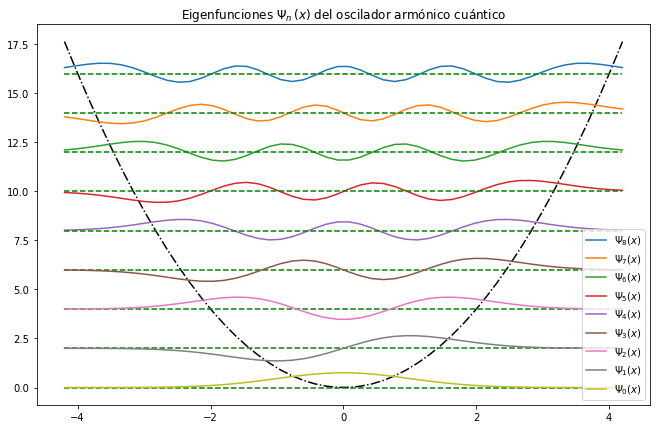

In [3]:
# Defino el dominio de x de -4.2 a 4.2 (de manera arbitraria)
x = np.linspace(-4.2,4.2)
par = x**2
    
plt.figure(figsize=(11,7))
plt.plot(x,par, "-.", color="black")

labels=["$\Psi_0(x)$","$\Psi_1(x)$","$\Psi_2(x)$","$\Psi_3(x)$","$\Psi_4(x)$","$\Psi_5(x)$",
        "$\Psi_6(x)$","$\Psi_7(x)$","$\Psi_8(x)$"]

for n in range(9):
    plt.plot(x, psi(x,8-n) + 2*(8-n), label=labels[8-n])
    plt.plot(x, x*0 + 2*n, "--g")
     
plt.title(r"Eigenfunciones $\Psi_n\,(x)$ del oscilador armónico cuántico")        
plt.legend(loc=4)
plt.show()

### - Proyectil con efectos de fricción 

Las componentes horizontal y vertical de la posición para un proyectil con efectos de fricción se pueden modelar respectivamente como

\begin{align*}
x(t) &= \frac{v_0v_t\cos\theta}{g}\left(1-e^{-gt/v_t}\right),\\
y(t) &= \frac{v_t}{g}(v_0\sin\theta+v_t)\left(1-e^{-gt/v_t}\right)-v_t t,
\end{align*}

con $v_t=mg/c$. Usando _matplotlib,_ grafique en la misma figura los casos $c=10^{-3}$, $c=0.2$, $c=1$ y $c=5$. Puede usar los valores $m=1$, $g=10$, $v_0=\sqrt{10}$ y $\theta=\pi/4$.



In [4]:
# Primero definimos las constantes

c = [10**(-3), 0.2, 1, 5];   # definimos los valores de c en una lista para acceder más fácilmente
m = 1;   g = 10;
v0 = np.sqrt(10);
th = np.pi/4;

In [5]:
# Definimos las funciones para x(t) y y(t):

def x(t,n):
    vt = m*g/c[n];
    coef1 = v0*vt*np.cos(th)/g;
    coef2 = 1 - np.exp(-(g*t)/vt);
    return coef1*coef2

def y(t,n):
    vt = m*g/c[n];
    coef1 = (vt/g)*(v0*np.sin(th)+vt);
    coef2 = 1 - np.exp(-(g*t)/vt);
    return coef1*coef2 - vt*t

[x(0,1), y(0,1)]

[0.0, 0.0]

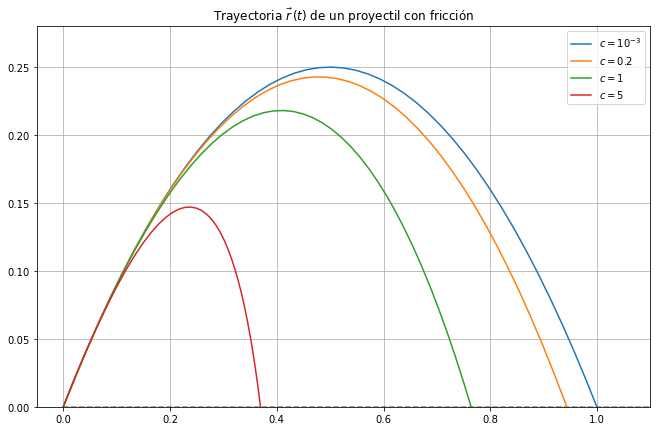

In [6]:
t = np.linspace(0,0.5);

plt.figure(figsize=(11,7))
plt.plot(x(t,0),t*0, "--", color="grey")
labels = ["$c=10^{-3}$", "$c=0.2$", "$c=1$", "$c=5$"]

for n in range(len(c)):
    plt.plot(x(t,n), y(t,n), label=labels[n])

plt.title(r"Trayectoria $\vec{r}\,(t)$ de un proyectil con fricción")
plt.grid()
plt.ylim((0,0.28)); plt.xlim((-0.05,1.1))
plt.legend()
plt.show()

## Errores de cancelación

Cuando se trata de operaciones sencillas pueden haber errores numéricos que hay que considerar. Por
ejemplo, la serie

\begin{equation*}
S_{der}=\sum_{n=1}^{N} \frac{1}{n}\, ,
\end{equation*}

y otra serie

\begin{equation*}
S_{rev}=\sum_{n=N}^{1} \frac{1}{n}\, ,
\end{equation*}

pueden dar distintos resultados en la práctica.  


1. Calcule el valor de $S_{der}$ y $S_{rev}$ como función de $N$

In [36]:
# Definimos las funciones S_der y S_rev

def S_der(N):
    suma = 0
    for n in range(N):
        suma += 1/(n+1)
    return suma

def S_rev(N):
    suma = 0
    for n in range(N)[::-1]:
        suma += 1/(n+1)
    return suma

for N in range(10):
    print([S_der(N), S_rev(N)])

[0, 0]
[1.0, 1.0]
[1.5, 1.5]
[1.8333333333333333, 1.8333333333333333]
[2.083333333333333, 2.083333333333333]
[2.283333333333333, 2.283333333333333]
[2.4499999999999997, 2.45]
[2.5928571428571425, 2.5928571428571425]
[2.7178571428571425, 2.7178571428571425]
[2.8289682539682537, 2.828968253968254]


2. Haga una gráfica log-log de $(S_{der} − S_{rev})/(|S_{der}| − |S_{rev}|)$ como función de $N$.

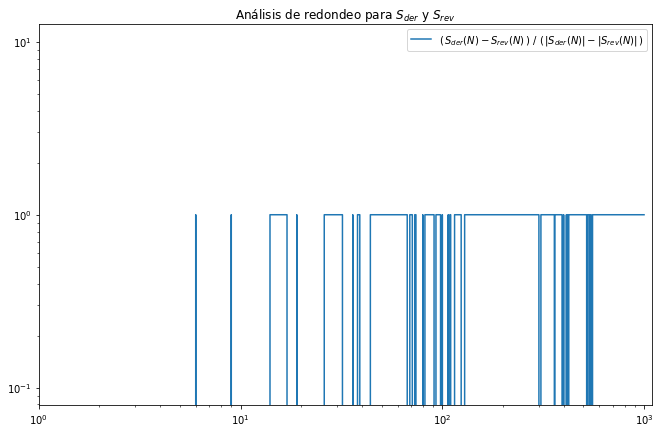

In [33]:
x = np.arange(1,1000,1)

S_diferencia = []
for N in x:
    try:
        S_diferencia.append((S_der(N)-S_rev(N)) /(abs(S_der(N)) - abs(S_rev(N)) ))
    except:
        S_diferencia.append(0)
        
label="$(\,S_{der}(N)-S_{rev}(N)\,)\ /\ (\,|S_{der}(N)|-|S_{rev}(N)|\,)$"

plt.figure(figsize=(11,7))
plt.loglog(x, S_diferencia, label=label)
plt.title("Análisis de redondeo para $S_{der}$ y $S_{rev}$")
plt.xlim(1, 10**(3)+100)
plt.legend()
plt.show()